In [60]:
using BenchmarkTools, LazySets, Plots
using LazySets: _brute_force_support_vector, _binary_support_vector
N = Float64
max_vertices = 50
d = N[1, 1]
d1 = Vector{BenchmarkTools.Trial}(undef, max_vertices)
d2 = Vector{BenchmarkTools.Trial}(undef, max_vertices)
for i=3:max_vertices
    P = rand(VPolygon, num_vertices=i)
    d1[i] = @benchmark _brute_force_support_vector($d, $P)
    d2[i] = @benchmark _binary_support_vector($d, $P)
end

UndefRefError: UndefRefError: access to undefined reference

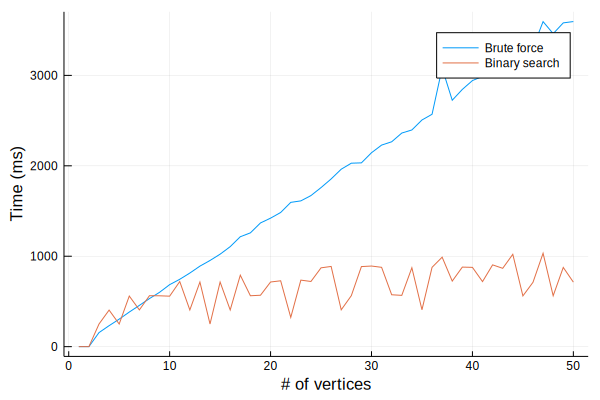

In [67]:
t1 = Vector{N}(undef, max_vertices)
t2 = Vector{N}(undef, max_vertices)
for i=3:max_vertices
    t1[i] = BenchmarkTools.time(BenchmarkTools.minimum(d1[i]))
    t2[i] = BenchmarkTools.time(BenchmarkTools.minimum(d2[i]))
end
plot(t1, label="Brute force", yaxis=("Time (ms)"), xaxis=("# of vertices"))
plot!(t2, label="Binary search")

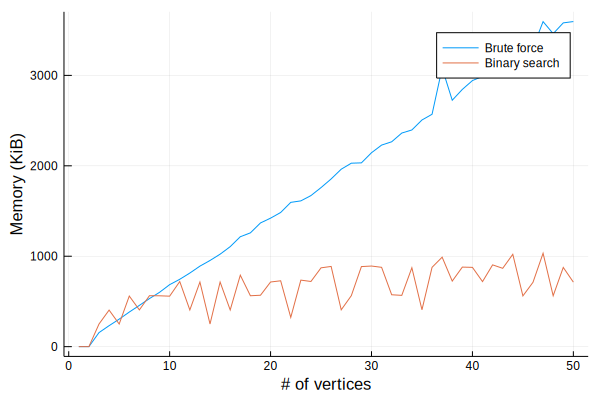

In [69]:
m1 = Vector{N}(undef, max_vertices)
m2 = Vector{N}(undef, max_vertices)
for i=3:max_vertices
    m1[i] = BenchmarkTools.memory(d1[i])/1024
    m2[i] = BenchmarkTools.memory(d2[i])/1024
end
plot(t1, label="Brute force", yaxis=("Memory (KiB)"), xaxis=("# of vertices"))
plot!(t2, label="Binary search")

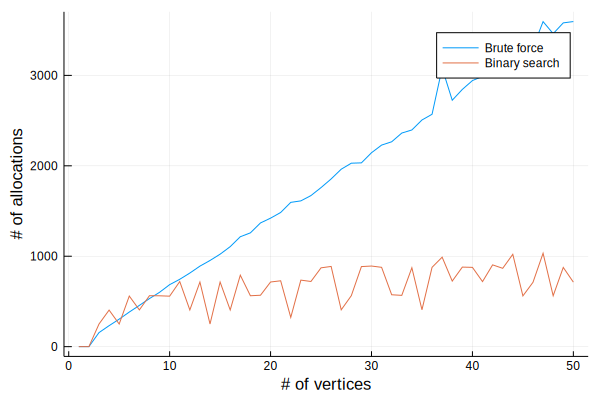

In [70]:
a1 = Vector{N}(undef, max_vertices)
a2 = Vector{N}(undef, max_vertices)
for i=3:max_vertices
    a1[i] = BenchmarkTools.allocs(d1[i])
    a2[i] = BenchmarkTools.allocs(d2[i])
end
plot(t1, label="Brute force", yaxis=("# of allocations"), xaxis=("# of vertices"))
plot!(t2, label="Binary search")